# K2 Data Science: Project 1
## Project Option 4 – Mathematics

## Project Prompt

In regard to the average human body temperature, is the true population mean really 98.6&deg;F? This
question is derived from this site. Read in the data by downloading the data file or by using
the URL with pandas and perform a z-test or t-test to prove that the true population mean is not
98.6&deg;F. Use numpy and scipy.

In [2]:
import pandas as pd
import scipy as sp
import math
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# jama data set
jama_data = pd.read_table('https://ww2.amstat.org/publications/jse/datasets/normtemp.dat.txt', 
                          sep="   ", 
                          engine='python',
                          header=None,
                          names = ["body_temp", "sex", "heart_rate"])

In [4]:
jama_data.describe()

,body_temp,sex,heart_rate
count,130.000000,130.000000,130.000000
mean,98.249231,1.500000,73.761538
std,0.733183,0.501934,7.062077
min,96.300000,1.000000,57.000000
25%,97.800000,1.000000,69.000000
50%,98.300000,1.500000,74.000000
75%,98.700000,2.000000,79.000000
max,100.800000,2.000000,89.000000


## Framing the Approach
Is the mean body temperature of the sample set actually the cannonically accepted population mean of 98.6&deg;F? If not, are the two values statistically different? These question were addressed using statistical hypothesis testing following the 4 steps below:

1. Define a null and alternative hypothesis.
2. Determine if data is normally distributed using a Kolmogorov–Smirnov Test for 'Goodness of Fit'.
3. Perform 1-sample t-test; in this case both a manual calculation and the built-in `scipy` test were performed.
4. Accept or reject null hypothesis based on t-test outcome.

### 1. Defining the Null and Alternative Hypothesis

**The Null Hypothesis:**

The true population mean of human body temperature is 98.6&deg;F.

**Alternative Hypothesis:**

The true population mean of human body temperature is **not** 98.6&deg;F. 

### 2. Determine if data is normally distributed using a Kolmogorov–Smirnov Test for 'Goodness of Fit'
Data must be normally distributed for a 1-sample t-test to be valid. This assumption was addressed by 1) plotting the data, and 2) using a Kolmogorov–Smirnov test, which is a non-parametric test to compare a sample with a reference probability distribution (one-sample K–S test).

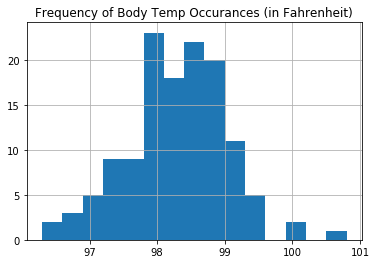

In [5]:
jama_data['body_temp'].hist(bins = 15).set_title('Frequency of Body Temp Occurances (in Fahrenheit)')

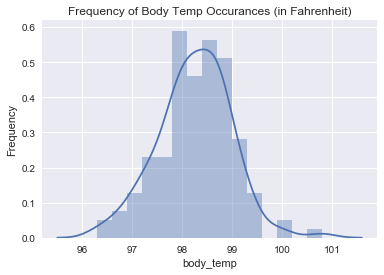

In [6]:
import seaborn as sns
sns.set(color_codes=True)

ax = sns.distplot(jama_data['body_temp'], bins = 15)
ax.set_title('Frequency of Body Temp Occurances (in Fahrenheit)')
ax.set_ylabel('Frequency')

The data was plotted using both the built-in Pandas plotting tool and the seaborn plotting package. The seaborn `distplot` plot includes a Kernel Density Estimation (KDE) to estimate the probability density function of the `'body_temp'` variable; this plot suggests a normal distribution. A Kolmogorov–Smirnov Test for 'Goodness of Fit' was also performed to confirm normality.

#### The Kolmogorov–Smirnov Test for 'Goodness of Fit'

First, the data was fit to a normal distribution using the `stats` package in `scipy` in order to determine the appropriate parameters for `'loc'` and `'scale'`. After establishing these parameters, a Kolmogorov–Smirnov test was run using the `cdf` of the fitted normal distribution and the original `jama_data['body_temp']` data set.

This test addresses the following hypotheses:

**The Null Hypotheses:**

The distribution of the human body temperature data set is normal.

**Alternative Hypotheses:**

The distribution of the human body temperature data set is **not** normal.

In [7]:
from scipy import stats
# first fit loc and scale for my data to a normal distribution
loc, scale = stats.norm.fit(jama_data['body_temp'])
# create a normal distribution with loc and scale
n = stats.norm(loc=loc, scale=scale)

stats.kstest(jama_data['body_temp'], n.cdf)

KstestResult(statistic=0.063853484278839079, pvalue=0.66453201728406608)

The low k-statistic and the high p-value determined by the Kolmogorov–Smirnov Test indicates that we cannot reject the null hypothesis and the data fits a normal distribution well. Upon establishing a normal data distribution, t-statistics were calculated.

### 3a. Perform 1-sample t-test (manual calculation)
To compare a given value (the accepted population mean) with a sample population (the data set), a '1-sample t test' statistic was calculated using the formula:   $$t = \frac{\bar x - \mu}{\frac{s}{\sqrt{n}}}$$

where $\bar x$ is the sample population mean, $\mu$ is the value given in the test hypothesis, $s$ is the standard deviation of the sample population, and $n$ is the number of observations in the sample population.

In [8]:
# manually calculate the t-statistic for a 1-sample t test

xbar = jama_data['body_temp'].mean()
mu = 98.6
s = jama_data['body_temp'].std()
n = len(jama_data['body_temp'])
dof = (len(jama_data)) -1
t = (xbar - mu)/((s/math.sqrt(n)))

print('the sample mean is {0:0.2f}'.format(xbar))
print('the one-sample t(dof = {}) is {}'.format(dof,t))

the sample mean is 98.25
the one-sample t(dof = 129) is -5.454823292364298


Looking up the t-statistic in a table of critical values, the α (0.0005, dof = 129) is 3.3676 and the p-value is <0.0001. This is much less than the absolute value of the t-statistic (-5.45) and there is a < 0.05% chance that the null hypothesis is correct. This test supports the alternative hypothesis that the true population mean of human body temperature is **not** 98.6&deg;F. 

### 3b. Perform 1-sample t-test (built-in `scipy` method)

In [9]:
print('the t-statistic is %6.9f and the p-value = %6.9f' %  stats.ttest_1samp(jama_data['body_temp'], mu))
print('We reject the null hypothesis. The true population mean of human body temperature is not 98.6 F. ')

the t-statistic is -5.454823292 and the p-value = 0.000000241
We reject the null hypothesis. The true population mean of human body temperature is not 98.6 F. 


Using the ```scipy stats``` package, statistical hypothesis testing is much simpler. As with the manual method, the t-statistic and p-value reject the null hypothesis and indicate that the true population mean of human body temperature is likely **not** 98.6&deg;F.

### 4. Accept or reject null hypothesis based on t-test outcome.
The null hypothesis is rejected. The true population mean of human body temperature is likely **not** 98.6&deg;F.

## Further Exploration
Using the framework established above for hypothesis testing, the relationship between sex and body temperature was explored.


This test will address the following hypotheses:

**The Null Hypotheses:**

The mean body temperature of males and females is the same.

**Alternative Hypotheses:**

The mean body temperature of males and females is **not** the same.

In [11]:
female = jama_data[jama_data['sex'] == 2]
male = jama_data[jama_data['sex'] == 1]

print('mean female body temp is {:f} with a standard deviation of {:f}, \nwhile mean male body temp is {:f} with a standard deviation of {:f}'.format(female['body_temp'].mean(),female['body_temp'].std(), male['body_temp'].mean(), male['body_temp'].std()))

mean female body temp is 98.393846 with a standard deviation of 0.743488, 
while mean male body temp is 98.104615 with a standard deviation of 0.698756


The mean body temperature is different for males and females. Let's first look at the distributions, then do a two-sample t-test to determine if this difference is statistically significant.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115598c18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11567ec88>], dtype=object)

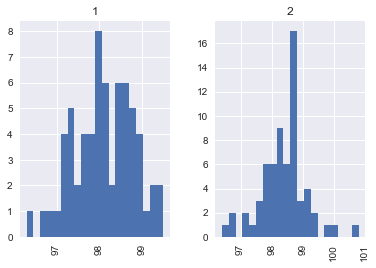

In [12]:
jama_data['body_temp'].hist(by=jama_data['sex'], bins = 20)

In [15]:
print('the t-statistic is %6.9f and the p-value = %6.9f' %  stats.ttest_ind(female['body_temp'], male['body_temp']))
print('We accept the null hypothesis that the mean body temperature of males and females is the same. ')

the t-statistic is 2.285434538 and the p-value = 0.023931883
We accept the null hypothesis that the mean body temperature of males and females is the same. 


Looking up the t-value in a table of critical values, the α (0.001, dof = 128) is 3.3682. The absolute value of the t-statistic is **less** than the critical value and the p-value (0.0239) is large, thus we accept the null hypothesis. The difference in mean body temperature of males and females is not statistically significant.

## Summary of findings

1. The sample mean body temperature data follows a normal distribution.

2. The sample mean body temperature of 98.25&deg;F is statistically different from the cannonically accepted 98.6&deg;F.

3. The difference in mean body temperature value for males and females is not statistically significant.


## Reference Links


https://ww2.amstat.org/publications/jse/datasets/normtemp.txt

http://sites.stat.psu.edu/~ajw13/stat200/Fall06/12_testmean/02_testmean.htm

https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

https://stackoverflow.com/questions/46678239/p-value-is-0-when-i-use-scipy-stats-kstest-for-large-dataset
